In [7]:
%matplotlib notebook
%load_ext autoreload
%pwd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/ocean/projects/asc170022p/mtragoza/lung-project/notebooks'

In [3]:
import sys
import pandas as pd
sys.path.append('../../param_search')
import param_search as ps

In [12]:
# define a job template and name format
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -x v034
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project
nvidia-smi

data_root=../../../data/{data_name}
data_root=$(realpath $data_root)

case_name=Case{case_id:d}{case_suffix}
case_dir=$data_root/$case_name

image_dir=$case_dir/NIFTI
mask_dir=$case_dir/TotalSegment
output_dir=$case_dir/CorrField

mkdir -p $output_dir

fixed_name=case{case_id:d}_T{fixed_phase:02d}
fixed_image=$image_dir/$fixed_name.nii.gz
fixed_mask=$mask_dir/$fixed_name/lung_combined_mask.nii.gz

moving_name=case{case_id:d}_T{moving_phase:02d}
moving_image=$image_dir/$moving_name.nii.gz

reg_name=case{case_id:d}_T{moving_phase:02d}_T{fixed_phase:02d}
output_path=$output_dir/$reg_name

cd ../../../../Lung250M-4B
python -m corrfield -F $fixed_image -M $moving_image -m $fixed_mask -O $output_path

echo Done
'''
name_format = 'register_{data_name}_case{case_id:d}_T{moving_phase:02d}_T{fixed_phase:02d}'

In [13]:
param_space = []
for p in ps.ParamSpace(
    data_name='Emory-4DCT',
    case_id=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    fixed_phase=[0, 10, 20, 30, 40, 50,60, 70, 80, 90],
    moving_phase=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
):
    if p['case_id'] == 8:
        p['case_suffix'] = 'Deploy'
    else:
        p['case_suffix'] = 'Pack'
    param_space.append(p)

for p in param_space:
    print(name_format.format(**p))
    
print(len(param_space))

register_Emory-4DCT_case1_T00_T00
register_Emory-4DCT_case1_T10_T00
register_Emory-4DCT_case1_T20_T00
register_Emory-4DCT_case1_T30_T00
register_Emory-4DCT_case1_T40_T00
register_Emory-4DCT_case1_T50_T00
register_Emory-4DCT_case1_T60_T00
register_Emory-4DCT_case1_T70_T00
register_Emory-4DCT_case1_T80_T00
register_Emory-4DCT_case1_T90_T00
register_Emory-4DCT_case1_T00_T10
register_Emory-4DCT_case1_T10_T10
register_Emory-4DCT_case1_T20_T10
register_Emory-4DCT_case1_T30_T10
register_Emory-4DCT_case1_T40_T10
register_Emory-4DCT_case1_T50_T10
register_Emory-4DCT_case1_T60_T10
register_Emory-4DCT_case1_T70_T10
register_Emory-4DCT_case1_T80_T10
register_Emory-4DCT_case1_T90_T10
register_Emory-4DCT_case1_T00_T20
register_Emory-4DCT_case1_T10_T20
register_Emory-4DCT_case1_T20_T20
register_Emory-4DCT_case1_T30_T20
register_Emory-4DCT_case1_T40_T20
register_Emory-4DCT_case1_T50_T20
register_Emory-4DCT_case1_T60_T20
register_Emory-4DCT_case1_T70_T20
register_Emory-4DCT_case1_T80_T20
register_Emory

In [14]:
jobs = ps.submit(template, name_format, param_space, work_dir='2024-06-28_register')
jobs.to_csv('2024-06-28_register.jobs')
jobs

100%|██████████| 1000/1000 [00:44<00:00, 22.63it/s]


/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/../../param_search/param_search/job_queues.py:235: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('', float('nan')).map(pd.to_numeric)


,data_name,case_id,fixed_phase,moving_phase,case_suffix,job_name,job_id,partition,job_state,node_id,runtime,work_dir,array_idx
0,Emory-4DCT,1,0,0,Pack,register_Emory-4DCT_case1_T00_T00,24360598,GPU-shared,RUNNING,v033,0:28,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
1,Emory-4DCT,1,0,10,Pack,register_Emory-4DCT_case1_T10_T00,24360599,GPU-shared,RUNNING,v033,0:28,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
2,Emory-4DCT,1,0,20,Pack,register_Emory-4DCT_case1_T20_T00,24360600,GPU-shared,RUNNING,v033,0:28,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
3,Emory-4DCT,1,0,30,Pack,register_Emory-4DCT_case1_T30_T00,24360601,GPU-shared,RUNNING,v033,0:28,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
4,Emory-4DCT,1,0,40,Pack,register_Emory-4DCT_case1_T40_T00,24360602,GPU-shared,RUNNING,v032,0:28,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Emory-4DCT,10,90,50,Pack,register_Emory-4DCT_case10_T50_T90,24361615,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
996,Emory-4DCT,10,90,60,Pack,register_Emory-4DCT_case10_T60_T90,24361616,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
997,Emory-4DCT,10,90,70,Pack,register_Emory-4DCT_case10_T70_T90,24361617,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN
998,Emory-4DCT,10,90,80,Pack,register_Emory-4DCT_case10_T80_T90,24361618,GPU-shared,PENDING,(None),0:00,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN


In [19]:
jobs = pd.read_csv('2024-06-28_register.jobs', index_col=0)
status = ps.status(jobs, parse_stderr=True)
status

,index,data_name,case_id,fixed_phase,moving_phase,case_suffix,job_name,partition,job_state,node_id,runtime,work_dir,array_idx,stdout,stderr
job_id,,,,,,,,,,,,,,,
24360598,0,Emory-4DCT,1,0,0,Pack,register_Emory-4DCT_case1_T00_T00,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
24360599,1,Emory-4DCT,1,0,10,Pack,register_Emory-4DCT_case1_T10_T00,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
24360600,2,Emory-4DCT,1,0,20,Pack,register_Emory-4DCT_case1_T20_T00,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
24360601,3,Emory-4DCT,1,0,30,Pack,register_Emory-4DCT_case1_T30_T00,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v033.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
24360602,4,Emory-4DCT,1,0,40,Pack,register_Emory-4DCT_case1_T40_T00,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v032.ib.bridges2.psc.edu\n/ocean/projects/asc1...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24361615,995,Emory-4DCT,10,90,50,Pack,register_Emory-4DCT_case10_T50_T90,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,/ocean/projects/asc170022p/mtragoza/Lung250M-4...
24361616,996,Emory-4DCT,10,90,60,Pack,register_Emory-4DCT_case10_T60_T90,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v029.ib.bridges2.psc.edu\n/ocean/projects/asc1...,/ocean/projects/asc170022p/mtragoza/Lung250M-4...
24361617,997,Emory-4DCT,10,90,70,Pack,register_Emory-4DCT_case10_T70_T90,GPU-shared,NaN,NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,NaN,v026.ib.bridges2.psc.edu\n/ocean/projects/asc1...,/ocean/projects/asc170022p/mtragoza/Lung250M-4...


In [21]:
print(status.iloc[-1].stdout)

v032.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/lung-project/notebooks/2024-06-28_register/register_Emory-4DCT_case10_T90_T90
Fri Jun 28 16:02:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           On  | 00000000:8A:00.0 Off |                    0 |
| N/A   32C    P0              39W / 300W |      0MiB / 16384MiB |      0%      Default |
|                  

## Check output files

In [24]:
%autoreload
sys.path.append('..')
import project

ds = project.Emory4DCTDataset(data_root='data/Emory-4DCT', case_names=['Case1Pack'])
ds.load_niftis()
ds.load_masks(roi='lung_combined_mask')
ds.load_displacements(fixed_phase=range(0, 100, 10))

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv004
--------------------------------------------------------------------------


RuntimeError: Could not find DOLFIN pkg-config file. Please make sure appropriate paths are set.

In [7]:
data.view_array(ds[0].array, groupby=['phase', 'y'], x='x', y='z', clim=(-1000, 1000))

:DynamicMap   [phase,y]
   :Image   [x,z]   (CT)

In [8]:
data.view_array(ds[0].mask, groupby=['phase', 'y'], x='x', y='z', clim=(0, 1))

:DynamicMap   [phase,y]
   :Image   [x,z]   (mask)

In [9]:
data.view_array(ds[0].disp, groupby=['phase', 'y', 'component'], x='x', y='z', clim=(-10, 10), cmap='seismic')

:DynamicMap   [phase,y,component]
   :Image   [x,z]   (displacement)

In [22]:
%pwd

'/ocean/projects/asc170022p/mtragoza/lung-project'

In [25]:
ds[0].array.phase.values

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [26]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [39]:
ds[0].array.phase

<xarray.DataArray 'phase' (phase: 10)>
array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Coordinates:
  * phase    (phase) int64 0 10 20 30 40 50 60 70 80 90

In [42]:
array0 = ds[0].array.sel(y=134.83, method='nearest')
array0 = array0.assign_coords(phase=array0.phase)
array1 = array0.assign_coords(phase=array0.phase + 100)
array2 = array0.assign_coords(phase=array0.phase + 200)
array3 = array0.assign_coords(phase=array0.phase + 300)
array = xr.concat([array0, array1, array2, array3], dim='phase')
array.phase

<xarray.DataArray 'phase' (phase: 40)>
array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390])
Coordinates:
    y        float64 134.8
  * phase    (phase) int64 0 10 20 30 40 50 60 ... 330 340 350 360 370 380 390

Creating video frames...
videos/lung_anat/frame0000.png
videos/lung_anat/frame0001.png
videos/lung_anat/frame0002.png
videos/lung_anat/frame0003.png
videos/lung_anat/frame0004.png
videos/lung_anat/frame0005.png
videos/lung_anat/frame0006.png
videos/lung_anat/frame0007.png
videos/lung_anat/frame0008.png
videos/lung_anat/frame0009.png
videos/lung_anat/frame0010.png
videos/lung_anat/frame0011.png
videos/lung_anat/frame0012.png
videos/lung_anat/frame0013.png
videos/lung_anat/frame0014.png
videos/lung_anat/frame0015.png
videos/lung_anat/frame0016.png
videos/lung_anat/frame0017.png
videos/lung_anat/frame0018.png
videos/lung_anat/frame0019.png
videos/lung_anat/frame0020.png
videos/lung_anat/frame0021.png
videos/lung_anat/frame0022.png
videos/lung_anat/frame0023.png
videos/lung_anat/frame0024.png
videos/lung_anat/frame0025.png
videos/lung_anat/frame0026.png
videos/lung_anat/frame0027.png
videos/lung_anat/frame0028.png
videos/lung_anat/frame0029.png
videos/lung_anat/frame0030.png
videos/lung_an

videos/lung_anat/frame0264.png
videos/lung_anat/frame0265.png
videos/lung_anat/frame0266.png
videos/lung_anat/frame0267.png
videos/lung_anat/frame0268.png
videos/lung_anat/frame0269.png
videos/lung_anat/frame0270.png
videos/lung_anat/frame0271.png
videos/lung_anat/frame0272.png
videos/lung_anat/frame0273.png
videos/lung_anat/frame0274.png
videos/lung_anat/frame0275.png
videos/lung_anat/frame0276.png
videos/lung_anat/frame0277.png
videos/lung_anat/frame0278.png
videos/lung_anat/frame0279.png
videos/lung_anat/frame0280.png
videos/lung_anat/frame0281.png
videos/lung_anat/frame0282.png
videos/lung_anat/frame0283.png
videos/lung_anat/frame0284.png
videos/lung_anat/frame0285.png
videos/lung_anat/frame0286.png
videos/lung_anat/frame0287.png
videos/lung_anat/frame0288.png
videos/lung_anat/frame0289.png
videos/lung_anat/frame0290.png
videos/lung_anat/frame0291.png
videos/lung_anat/frame0292.png
videos/lung_anat/frame0293.png
videos/lung_anat/frame0294.png
videos/lung_anat/frame0295.png
videos/l

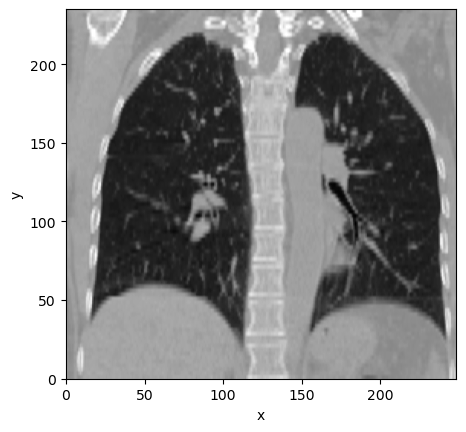

In [43]:
%%time
import os
import subprocess
import matplotlib.pyplot as plt

def imshow(ax, a, **kwargs):
    assert a.ndim == 2
    n_x, n_y = a,shape
    extent = (0, (n_x - 1) * resolution, 0, (n_y - 1) * resolution)
    return ax.imshow(a_T, origin='lower', extent=extent, **kwargs)

def create_video(video_name, array, resolution, **kwargs):
    
    n_t, n_x, n_y = array.shape
    x_res, y_res = resolution
    
    print('Creating video frames...')
    os.makedirs(video_name, exist_ok=True)
    for i, frame in enumerate(array):
        frame_file = video_name + f'/frame{i:04d}.png'
        extent = (0, n_x * x_res, 0, n_y * y_res)
        plt.imshow(frame.T, origin='lower', extent=extent, **kwargs)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.savefig(frame_file)
        print(frame_file)

create_video(
    'videos/lung_anat',
    array=array.interp(phase=np.arange(0, 400)),
    resolution=(0.97, 2.5),
    cmap='Greys_r', vmin=-1000, vmax=1000
)

In [10]:
ds[0].array

<xarray.DataArray 'CT' (phase: 10, x: 256, y: 256, z: 94)>
array([[[[-963., -963., -960., ..., -966., -972., -984.],
         [-963., -974., -953., ..., -977., -979., -983.],
         [-954., -969., -980., ..., -979., -967., -980.],
         ...,
         [-420., -416., -397., ..., -716., -640., -695.],
         [-692., -702., -676., ..., -847., -863., -831.],
         [-815., -823., -812., ..., -885., -897., -875.]],

        [[-962., -968., -977., ..., -964., -975., -988.],
         [-975., -969., -964., ..., -974., -974., -987.],
         [-977., -966., -954., ..., -979., -978., -976.],
         ...,
         [-409., -413., -385., ..., -700., -644., -703.],
         [-684., -703., -689., ..., -834., -852., -848.],
         [-810., -816., -816., ..., -875., -889., -885.]],

        [[-972., -967., -971., ..., -965., -991., -969.],
         [-967., -965., -984., ..., -966., -974., -979.],
         [-971., -973., -956., ..., -959., -977., -985.],
         ...,
...
         ...,
         [-689., -692., -697., ..., -846., -779., -841.],
         [-843., -818., -835., ..., -885., -865., -879.],
         [-849., -857., -854., ..., -891., -868., -900.]],

        [[-967., -958., -980., ..., -970., -978., -975.],
         [-972., -953., -966., ..., -967., -980., -972.],
         [-966., -970., -964., ..., -977., -980., -984.],
         ...,
         [-676., -691., -694., ..., -843., -775., -840.],
         [-843., -825., -836., ..., -867., -859., -887.],
         [-860., -848., -867., ..., -891., -873., -905.]],

        [[-968., -971., -973., ..., -981., -971., -968.],
         [-969., -978., -959., ..., -979., -976., -975.],
         [-954., -976., -962., ..., -976., -977., -972.],
         ...,
         [-700., -689., -691., ..., -849., -778., -839.],
         [-832., -830., -845., ..., -866., -876., -866.],
         [-858., -853., -858., ..., -884., -899., -887.]]]])
Coordinates:
  * phase    (phase) int64 0 10 20 30 40 50 60 70 80 90
  * x        (x) float64 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * y        (y) float64 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * z        (z) float64 0.0 2.5 5.0 7.5 10.0 ... 222.5 225.0 227.5 230.0 232.5

In [13]:
import torch
import torch.nn.functional as F
sys.path.append('../Lung250M-4B')
import corrfield

In [14]:
ds[0].disp.sel(phase=0)

<xarray.DataArray 'displacement' (x: 256, y: 256, z: 94, component: 3)>
array([[[[-0.19725657,  0.18855788,  3.72065806],
         [-0.19202898,  0.22886273,  3.72118616],
         [-0.18680154,  0.2691676 ,  3.72171426],
         ...,
         [-0.99159646,  1.33488357,  2.63766527],
         [-0.97847289,  1.33290517,  2.64906716],
         [-0.96534938,  1.33092666,  2.66046929]],

        [[-0.19068624,  0.17473309,  3.68711996],
         [-0.18529861,  0.21557614,  3.6876483 ],
         [-0.17991096,  0.25641915,  3.68817663],
         ...,
         [-0.98869127,  1.32499492,  2.62248778],
         [-0.97549385,  1.32283068,  2.63378382],
         [-0.96229696,  1.32066631,  2.64507985]],

        [[-0.18411592,  0.16090827,  3.65358114],
         [-0.17856809,  0.20228951,  3.65410995],
         [-0.17302063,  0.24367069,  3.65463829],
         ...,
...
         ...,
         [ 1.85563898, -2.40501404,  1.17633808],
         [ 1.88574946, -2.40881371,  1.20866549],
         [ 1.91586041, -2.41261339,  1.24099326]],

        [[ 3.06607032, -5.70032978, -2.49166203],
         [ 3.04808044, -5.6315341 , -2.43805313],
         [ 3.03009081, -5.56273794, -2.384444  ],
         ...,
         [ 1.85949504, -2.43069506,  1.18595457],
         [ 1.88910162, -2.43423462,  1.21795213],
         [ 1.91870844, -2.43777442,  1.24994993]],

        [[ 3.06481266, -5.72020769, -2.47239232],
         [ 3.04646468, -5.65178394, -2.41900229],
         [ 3.02811646, -5.5833602 , -2.36561227],
         ...,
         [ 1.86335087, -2.45637584,  1.19557106],
         [ 1.89245379, -2.45965552,  1.22723877],
         [ 1.92155671, -2.46293497,  1.25890672]]]])
Coordinates:
    phase      int64 0
  * x          (x) float64 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * y          (y) float64 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * z          (z) float64 0.0 2.5 5.0 7.5 10.0 ... 225.0 227.5 230.0 232.5
  * component  (component) <U1 'x' 'y' 'z'

In [15]:
nib.load('data/Emory-4DCT/Case1Pack/NIFTI/case1_T50.nii.gz').shape

NameError: name 'nib' is not defined

In [ ]:
device = 'cuda'

img_mov = torch.from_numpy(
    ds[0].array.sel(phase=0).values.astype(np.float32)
).unsqueeze(0).unsqueeze(0).to(device)

img_fix = torch.from_numpy(
    ds[0].array.sel(phase=50).values.astype(np.float32)
).unsqueeze(0).unsqueeze(0).to(device)

mask_fix = torch.from_numpy(
    ds[0].mask.sel(phase=50).values.astype(np.float32)
).unsqueeze(0).unsqueeze(0).to(device)

img_mov.shape, img_fix.shape

In [ ]:
dense_flow_world = torch.from_numpy(ds[0].disp.sel(phase=0).values).unsqueeze(0).to(device)
dense_flow_world.shape

In [ ]:
_, _, D, H, W = img_fix.shape

dense_flow_pt = corrfield.utils.flow_pt(
    dense_flow_world.reshape(1, -1, 3), (D, H, W), align_corners=True
).reshape(1, D, H, W, 3)

In [ ]:
img_mov_warped = F.grid_sample(
    img_mov,
    F.affine_grid(
        torch.eye(3, 4, dtype=img_mov.dtype, device=device).unsqueeze(0),
        (1, 1, D, H, W),
        align_corners=True
    ) + dense_flow_pt.to(img_mov.dtype),
    align_corners=True
)

In [ ]:
data.view_array(
    xr.DataArray(
        img_mov_warped.squeeze(0).squeeze(0).detach().cpu().numpy(),
        dims=['x', 'y', 'z'],
        coords={
            'x': ds[0].array.x,
            'y': ds[0].array.y,
            'z': ds[0].array.z,
        }
    ),
    groupby=['y'],
    x='x',
    y='z',
    clim=(-1000, 1000)
)

In [ ]:
torch.norm((img_fix - img_mov) * mask_fix)

In [ ]:
torch.norm((img_fix - img_mov_warped) * mask_fix)

In [ ]:
data.view_array(
    xr.DataArray(
        torch.cat([
            img_mov, img_fix, img_mov_warped
        ], dim=0).squeeze(1).detach().cpu().numpy(),
        dims=['image', 'x', 'y', 'z'],
        coords={
            'image': ['moving', 'fixed', 'warped'],
            'x': ds[0].array.x,
            'y': ds[0].array.y,
            'z': ds[0].array.z,
        }
    ),
    groupby=['y', 'image'],
    x='x',
    y='z',
    clim=(-1000, 1000)
)

In [ ]:
kpts_mov_world = torch.from_numpy(ds[0].landmarks[0]).unsqueeze(0).to(device)
kpts_mov_world.shape

In [ ]:
kpts_fix_world = torch.from_numpy(ds[0].landmarks[5]).unsqueeze(0).to(device)
kpts_fix_world.shape

In [ ]:
kpts_fix_pt = corrfield.utils.kpts_pt(kpts_fix_world, (D, H, W), align_corners=True)
kpts_fix_pt.shape

In [ ]:
kpts_flow_pt = F.grid_sample(
    dense_flow_pt.permute(0, 4, 1, 2, 3),
    kpts_fix_pt.view(1, 1, 1, -1, 3),
    align_corners=True
).view(1, 3, -1).permute(0, 2, 1)
kpts_flow_pt.shape

In [ ]:
kpts_mov_corr_pt = kpts_fix_pt + kpts_flow_pt

In [ ]:
kpts_mov_corr_world = corrfield.utils.kpts_world(kpts_mov_corr_pt, (D, H, W), align_corners=True)

In [ ]:
torch.norm(kpts_mov_world - kpts_fix_world)

In [ ]:
torch.norm(kpts_mov_world - kpts_mov_corr_world)